In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk 
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk 
from nltk import word_tokenize

from nltk.corpus import stopwords
import re
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


from sklearn.linear_model import LogisticRegression
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [2]:

df = pd.read_csv('all.csv',header=0,encoding = 'unicode_escape')

In [3]:
df.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


In [4]:
print(df.size,df.shape)


2885 (577, 5)


In [5]:
def removePunctuation(x):
    x = x.lower()
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    x = x.replace('\r','')
    x = x.replace('\n','')
    x = x.replace('  ','')
    x = x.replace('\'','')
    return re.sub("["+string.punctuation+"]", " ", x)
#removes the punctuations of given input and replaces it with blank space

In [6]:
#stop worfs are the frequently used words like the , and , an , a etc..
stops = set(stopwords.words("english"))
def removeStopwords(x):
    filtered_words = [word for word in x.split() if word not in stops]
    return " ".join(filtered_words)


In [7]:
def processText(x):
    x= removePunctuation(x)
    x= removeStopwords(x)
    return x

In [8]:
df.groupby('type').count()

,author,content,poem name,age
type,,,,
Love,326,326,326,326
Mythology & Folklore,59,59,58,59
Nature,188,188,187,188
War,4,4,4,4


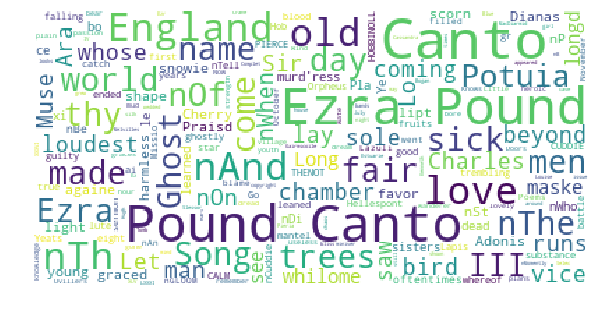

In [9]:
import numpy as np # linear algebra
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df[df['type']=='Mythology & Folklore']['content']))

fig = plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

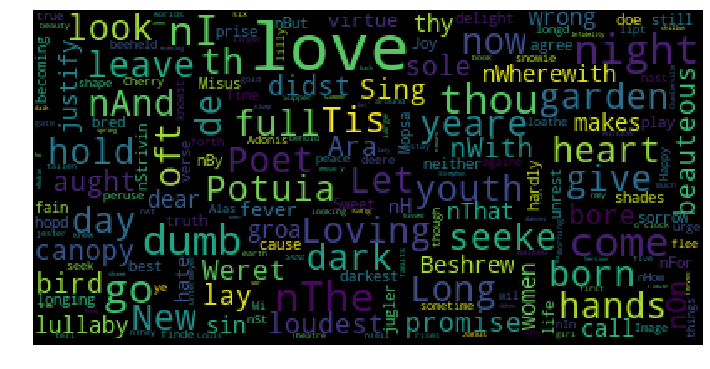

In [10]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df[df['type']=='Love']['content']))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

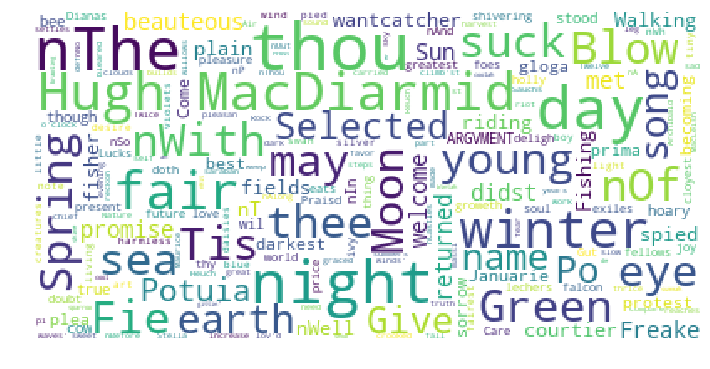

In [11]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df[df['type']=='Nature']['content']))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

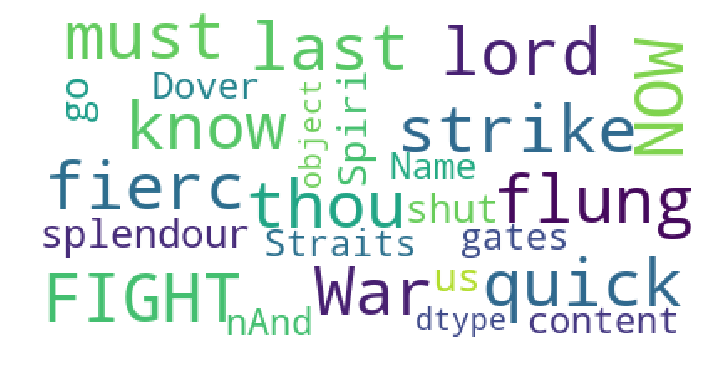

In [12]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df[df['type']=='War']['content']))

fig = plt.figure(1,figsize=(12,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

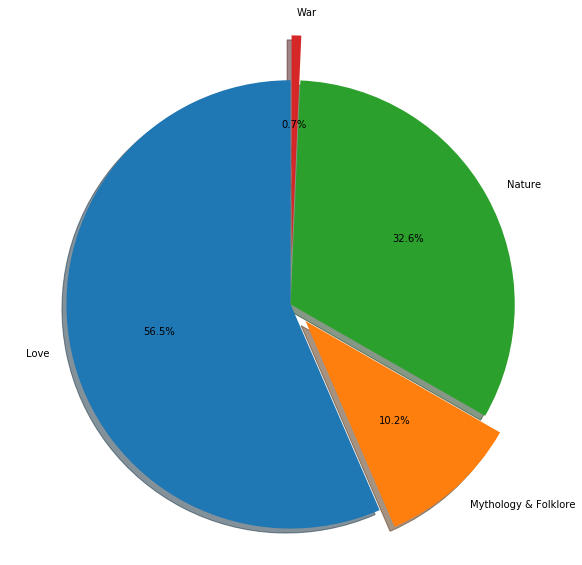

In [13]:
labels = 'Love', 'Mythology & Folklore', 'Nature' ,'War'
sizes = [326, 59, 188 , 4]
explode = (0, 0.1, 0,0.2)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [14]:
len(df['author'].unique())

71

In [15]:
df['author'].value_counts().head(10)

WILLIAM SHAKESPEARE     71
SIR PHILIP SIDNEY       42
JOHN DONNE              41
EDMUND SPENSER          34
WILLIAM BUTLER YEATS    26
SIR THOMAS WYATT        22
EZRA POUND              16
CARL SANDBURG           16
THOMAS CAMPION          15
HART CRANE              14
Name: author, dtype: int64

In [16]:
df['age'].unique()

array(['Renaissance', 'Modern'], dtype=object)

In [17]:
df['type'].unique()

array(['Mythology & Folklore', 'Nature', 'Love', 'War'], dtype=object)

In [18]:
from nltk.tokenize import sent_tokenize, word_tokenize
tin = pd.Series([word_tokenize(processText(x)) for x in df['content']])
tin.head(10)

0    [let, bird, loudest, layon, sole, arabian, tre...
1    [sir, charles, chamber, coming, writing, fairy...
2    [vice, runs, beyond, old, men, saw, far, authe...
3    [lo, man, whose, muse, whilome, maske, time, t...
4    [long, longd, see, love, againe, still, wisht,...
5    [cherry, lipt, adonis, snowie, shape, might, c...
6    [praisd, dianas, fair, harmless, light, praisd...
7    [fair, young, favor, graced, many, sought, mis...
8    [thy, scorn, murdress, dead, thou, thinkst, th...
9    [pla, ce, bo, di, le, xi, dame, margery, fa, w...
dtype: object

In [19]:
from gensim.models import word2vec
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words
model = word2vec.Word2Vec(tin, workers=num_workers,size=num_features, 
                          min_count = min_word_count,
                          window = context, sample = downsampling)

##This model can be used to perdict the nearest matcing poem genre  to any word or set of words

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
C:\anaconda\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [20]:
#vectorizing X and y to process
vectorize=CountVectorizer(max_df=0.95, min_df=0.005)
X=vectorize.fit_transform(df['content'], df['author'])
vect = CountVectorizer(tokenizer = lambda x: x.split(), binary = 'true')
y = vect.fit_transform(df.type)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [25]:
#sgd classifier

classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.00001, penalty='l1'), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.4869109947643979
macro f1 score : 0.2290388796700157
micro f1 scoore : 0.5068493150684933
hamming loss : 0.18848167539267016
Precision recall report :
               precision    recall  f1-score   support

           0       0.12      0.15      0.13        20
           1       0.07      0.05      0.06        20
           2       0.72      0.75      0.74       115
           3       0.00      0.00      0.00        20
           4       0.53      0.40      0.45        53
           5       0.00      0.00      0.00         3

   micro avg       0.54      0.48      0.51       231
   macro avg       0.24      0.22      0.23       231
weighted avg       0.50      0.48      0.49       231
 samples avg       0.53      0.57      0.54       231



C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [26]:
#logistic regression

classifier = OneVsRestClassifier(LogisticRegression(penalty='l1'), n_jobs=-1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

print("accuracy :",metrics.accuracy_score(y_test,predictions))
print("macro f1 score :",metrics.f1_score(y_test, predictions, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, predictions, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,predictions))
print("Precision recall report :\n",metrics.classification_report(y_test, predictions))

accuracy : 0.5340314136125655
macro f1 score : 0.27196123361812513
micro f1 scoore : 0.5314685314685315
hamming loss : 0.17539267015706805
Precision recall report :
               precision    recall  f1-score   support

           0       0.17      0.10      0.12        20
           1       0.18      0.10      0.13        20
           2       0.80      0.66      0.72       115
           3       0.17      0.10      0.12        20
           4       0.47      0.60      0.53        53
           5       0.00      0.00      0.00         3

   micro avg       0.58      0.49      0.53       231
   macro avg       0.30      0.26      0.27       231
weighted avg       0.55      0.49      0.51       231
 samples avg       0.55      0.58      0.56       231



In [27]:
##NN IMPLEMENTATION

In [28]:
content = df['content'].tolist()[:3]

In [29]:
def sent_to_words(content):
    return [np.array([x.split() for x in poem.split()]) for poem in content]

In [30]:
poems = sent_to_words(content)

In [31]:
def build_dict(poems):
    dictionary = {}
    rev_dict = {}
    count = 0
    for content in poems:
        for i in content:
            if i[0] in dictionary:
                pass
            else:
                dictionary[i[0]] = count
                count += 1
    rev_dict = dict(zip(dictionary.values(), dictionary.keys()))
    return dictionary, rev_dict

#for char to number mapping

In [32]:
dictionary, rev_dict = build_dict(poems)

In [33]:
import tensorflow as tf
from tensorflow.contrib import rnn

In [34]:
vocab_size = len(dictionary)

In [35]:
# Parameters
learning_rate = 0.0001
training_iters = 1600
display_step = 200
n_input = 9


In [36]:
# number of units in RNN cell
n_hidden = 512

In [37]:
# tf Graph input
tf.device("/device:GPU:0")
x = tf.placeholder("float", [None, n_input, 1])
y = tf.placeholder("float", [None, vocab_size])

In [38]:
# RNN output node weights and biases
weights = {
    'out': tf.Variable(tf.random_normal([n_hidden, vocab_size]))
}
biases = {
    'out': tf.Variable(tf.random_normal([vocab_size]))
}

Instructions for updating:
Colocations handled automatically by placer.


In [39]:
def RNN(x, weights, biases):

    # reshape to [1, n_input]
    x = tf.reshape(x, [-1, n_input])

    # Generate a n_input-element sequence of inputs
    # (eg. [had] [a] [general] -> [20] [6] [33])
    x = tf.split(x,n_input,1)

    # 2-layer LSTM, each layer has n_hidden units.
    # Average Accuracy= 95.20% at 50k iter
    rnn_cell = rnn.MultiRNNCell([rnn.BasicLSTMCell(n_hidden),rnn.BasicLSTMCell(n_hidden)])
    # generate prediction
    outputs, states = rnn.static_rnn(rnn_cell, x, dtype=tf.float32)
    # there are n_input outputs but
    # we only want the last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

In [40]:
pred = RNN(x, weights, biases)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API


In [41]:
# Loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [42]:
# Model evaluation
correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


In [43]:
saver = tf.train.Saver()
init = tf.global_variables_initializer()

In [45]:
df_train = sent_to_words(content)
j = 0

for i in df_train:
    if i.shape[0] <= n_input:
        df_train = np.delete(df_train, (j), axis = 0)
        j -= 1
    j += 1

In [ ]:
with tf.Session() as session:
    session.run(init)
    step = 0
    end_offset = n_input + 1
    acc_total = 0
    loss_total = 0
    while step < training_iters:
        acc_total = 0
        loss_total = 0
        j = 0
        for training_data in df_train:
            m = training_data.shape[0]
            windows = m - n_input
            acc_win = 0
            for window in range(windows):
                batch_x = training_data[window : window + n_input]
                batch_y = training_data[window + n_input]
                symbols_in_keys = [dictionary[i[0]] for i in batch_x]
                symbols_in_keys = np.reshape(np.array(symbols_in_keys), [-1, n_input, 1])
        
                symbols_out_onehot = np.zeros([vocab_size], dtype=float)
                symbols_out_onehot[dictionary[batch_y[0]]] = 1.0
                symbols_out_onehot = np.reshape(symbols_out_onehot,[1,-1])

                _, acc, loss, onehot_pred = session.run([optimizer, accuracy, cost, pred], feed_dict={x: symbols_in_keys, y: symbols_out_onehot})
                loss_total += loss
                acc_win += acc
            acc_total += float(acc_win) / m
        acc_total /= len(df_train)
        if (step+1) % display_step == 0:
            print("Iter= " + str(step+1) + ", Average Loss= " + \
                  "{:.6f}".format(loss_total/display_step) + ", Average Accuracy= " + \
                  "{:.2f}%".format(100*acc_total))
        step += 1
    print("Optimization Finished!")
    save_path = saver.save(session, "../working/model.ckpt")
    print("Model saved in path: %s" % save_path)
    while True:
        prompt = "%s words: " % n_input
        sentence = 'When I Queen Mab within my fancy viewed, My'
        sentence = sentence.strip()
        words = sentence.split(' ')
        if len(words) != n_input:
            continue
        try:
            symbols_in_keys = [dictionary[str(words[i])] for i in range(len(words))]
            for i in range(64):
                keys = np.reshape(np.array(symbols_in_keys), [-1, n_input, 1])
                onehot_pred = session.run(pred, feed_dict={x: keys})
                onehot_pred_index = int(tf.argmax(onehot_pred, 1).eval())
                sentence = "%s %s" % (sentence,rev_dict[onehot_pred_index])
                symbols_in_keys = symbols_in_keys[1:]
                symbols_in_keys.append(onehot_pred_index)
            print(sentence)
            break
        except:
            print("Word not in dictionary")